In [1]:
from pinpoint import Tracker, VideoReader
import matplotlib.pyplot as plt
import time
import h5py
import glob
import numpy as np

In [2]:
videos = glob.glob("/home/jake/fish_videos/*.mp4")
videos

['/home/jake/fish_videos/kowa_1dot5k0_5stickle4x4l_20170615_125516.libx264-crf20-mf-yuv420-gray.mp4',
 '/home/jake/fish_videos/kowa_2k2_5stickle4x4l_20170615_125608.libx264-crf20-mf-yuv420-gray.mp4',
 '/home/jake/fish_videos/kowa_1dot5k2_5stickle4x4l_20170615_125449.libx264-crf20-mf-yuv420-gray.mp4',
 '/home/jake/fish_videos/kowa_2k0_5stickle4x4l_20170615_125636.libx264-crf20-mf-yuv420-gray.mp4']

In [3]:
tracker = Tracker(source=videos[0],
                  block_size=51,
                  offset=-5,
                  distance_threshold=20,
                  area_range=(50,1000),
                  tolerance=0.1,
                  channel='green',
                  resize=2)

In [4]:
tracker.load_dict('/home/jake/pinpoint/barcodes/4x4_4bit/master_list.pkl')

True

In [5]:
t0 = time.time()
fetch_dict = tracker.track('output.h5',batch_size=200, n_jobs=-1)
t1 = time.time()
dt = t1-t0
fps = tracker.total_frames()/dt
print(fps)

6.61318045691


In [ ]:
#set n_jobs to 1 to get gray and threshold images as output in fetch_dict
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, squeeze=True, figsize=(50,100))
ax1.imshow(fetch_dict["gray"], cmap='gray', interpolation='none')
ax2.imshow(fetch_dict["thresh"], cmap='gray', interpolation='none')
plt.show()

In [6]:
f = h5py.File('output.h5', 'r')

In [7]:
frame_idx = f['data/frame_idx'].value
corners = f['data/corners'].value
identity = f['data/identity'].value
distances = f['data/distances'].value

In [10]:
zip(f.attrs.keys(), f.attrs.values())

[(u'fps', 30),
 (u'codec', 828601953),
 (u'height', 3008),
 (u'width', 4112),
 (u'total_frames', 561),
 (u'source',
  '/home/jake/fish_videos/kowa_1dot5k0_5stickle4x4l_20170615_125516.libx264-crf20-mf-yuv420-gray.mp4')]

In [11]:
fps = f.attrs['fps']
codec = f.attrs['codec']
height = f.attrs['height']
width = f.attrs['width']
total_frames = f.attrs['total_frames']
source = f.attrs['source']

In [12]:
f.close()

In [13]:
corners

array([[[ 3077.79199219,   366.85922241],
        [ 3067.19360352,   355.00949097],
        [ 3056.12207031,   363.82391357],
        [ 3066.16845703,   376.40402222]],

       [[ 3067.9309082 ,   375.83428955],
        [ 3056.26074219,   364.65313721],
        [ 3046.47070312,   373.98098755],
        [ 3056.86621094,   386.13861084]],

       [[ 2764.06738281,   158.35499573],
        [ 2763.93823242,   141.76173401],
        [ 2749.73803711,   142.75585938],
        [ 2748.95507812,   158.71234131]],

       ..., 
       [[ 2178.9362793 ,  2780.27050781],
        [ 2173.41430664,  2794.87695312],
        [ 2187.94995117,  2800.76416016],
        [ 2193.11401367,  2786.10205078]],

       [[ 2413.89428711,  2727.72241211],
        [ 2407.51245117,  2741.26074219],
        [ 2421.48779297,  2749.06347656],
        [ 2427.73535156,  2735.12988281]],

       [[ 2172.00708008,  2625.12915039],
        [ 2167.99853516,  2639.73193359],
        [ 2182.26513672,  2645.29443359],
        [ 2

In [18]:
np.unique(identity[distances < 1])

array([ 1, 21, 41, 61, 81], dtype=int32)

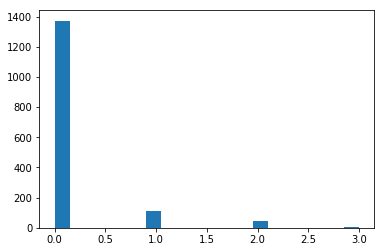

In [21]:
plt.hist(distances, bins=20)
plt.show()